In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [109]:
df = pd.read_csv('../data/parkinsons/parkinsons.csv')
print(df.shape)
df.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [29]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
subject_id          0
dtype: int64

In [110]:
df['subject_id'] = df['name'].apply(lambda x: x.split('_')[2])
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,subject_id
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,S01
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,S01
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,S01
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,S01
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,S01


In [111]:
X = df.drop(['name', 'status', 'subject_id'], axis=1)
y = df['status']
groups = df['subject_id']


In [112]:
# Масштабирование данных (нужно для SVM и KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

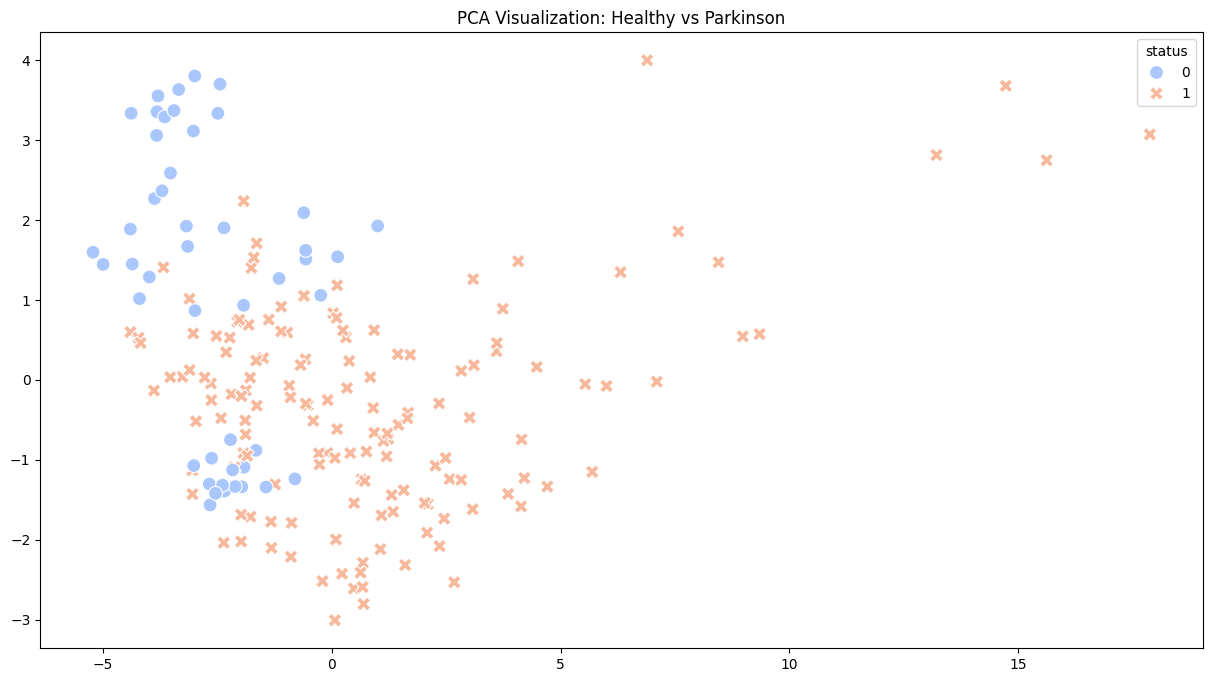

In [88]:
# ---------------------------------------------------------
# 2. DIMENSIONALITY REDUCTION (PCA) & VISUALIZATION
# ---------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, style=y, palette='coolwarm', s=100)
plt.title('PCA Visualization: Healthy vs Parkinson')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
plt.show()

In [166]:
# 4. CLASSIFICATION WITH SMOTE (Imbalanced Data)

gss = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# 2. Применяем SMOTE (синтез данных) ТОЛЬКО на Train
# Примечание: для работы SMOTE нужно мин. 2 примера каждого класса. 
# В моем маленьком примере их ровно 2, поэтому k_neighbors=1. В реальных данных оставь k_neighbors=5 (по умолчанию).
smote = SMOTE(random_state=42, k_neighbors=1) 
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Original Train shape: {y_train.shape}")
print(f"Resampled (SMOTE) Train shape: {y_train_res.shape}")

# 3. Обучаем Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_res, y_train_res)

Original Train shape: (146,)
Resampled (SMOTE) Train shape: (220,)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.75      0.97      0.85        37

    accuracy                           0.73        49
   macro avg       0.38      0.49      0.42        49
weighted avg       0.57      0.73      0.64        49



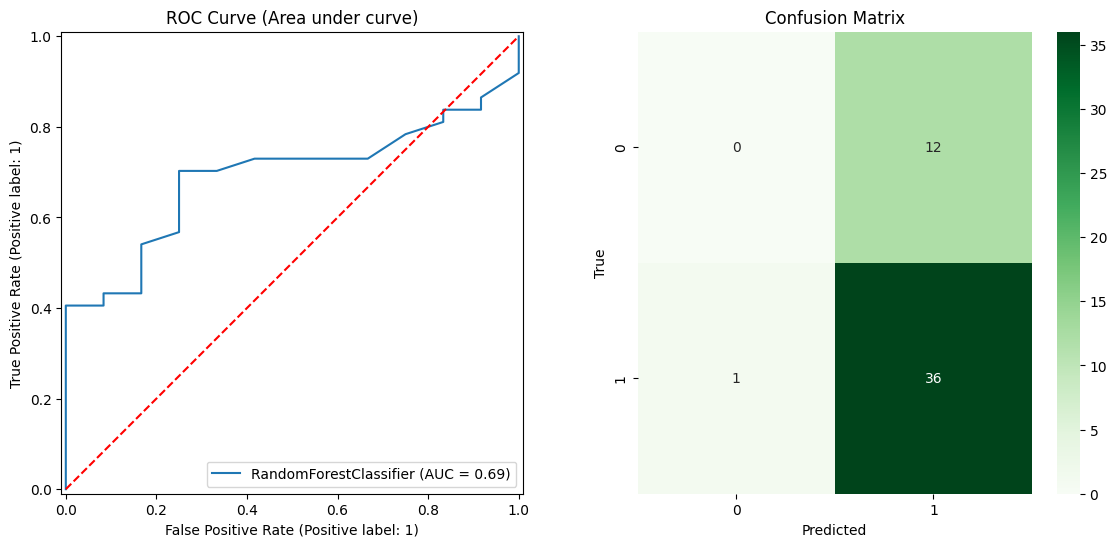

In [113]:
print(f"Data Shape: {df.shape}")
print(f'''Class Balance 
1 --> Parkinson's Positive
0 --> Healthy:
{y.value_counts()}''')

Data Shape: (195, 25)
Class Balance 
1 --> Parkinson's Positive
0 --> Healthy:
status
1    147
0     48
Name: count, dtype: int64


In [114]:
df['subject_id'].value_counts().head()

subject_id
S35    7
S27    7
S21    7
S01    6
S25    6
Name: count, dtype: int64

In [115]:
# Используем GroupShuffleSplit, чтобы S01 был только в train или только в test
gss = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [116]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (146, 22) (49, 22)


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [168]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Kernel=RBF)": SVC(kernel='rbf', C=1.0),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [206]:
print("\n--- Model Results without SMOTE ---")

best_accuracy = 0.0
best_model_name = None
best_pred = None
clf = None


for name, model in models.items():
    # Обучение
    model.fit(X_train, y_train)
    
    # Предсказание
    X_train_prediction = model.predict(X_test)
    
    # Оценка
    acc = accuracy_score(y_test, X_train_prediction)
    print(f"{name} Accuracy: {acc:.2f}")
    
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_pred = y_pred
        clf = model 
    
    


--- Model Results without SMOTE ---
Logistic Regression Accuracy: 0.63
SVM (Kernel=RBF) Accuracy: 0.69
KNN (k=5) Accuracy: 0.78
Random Forest Accuracy: 0.71


In [205]:
print("\n--- Model Results with SMOTE ---")

best_accuracy = 0.0
best_model_name = None
best_pred = None
clf = None


for name, model in models.items():
    # Обучение
    model.fit(X_train_res, y_train_res)
    
    # Предсказание
    X_train_prediction = model.predict(X_test)
    
    # Оценка
    acc = accuracy_score(y_test, X_train_prediction)
    print(f"{name} Accuracy: {acc:.2f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_pred = y_pred
        clf = model 



--- Model Results with SMOTE ---
Logistic Regression Accuracy: 0.59
SVM (Kernel=RBF) Accuracy: 0.63
KNN (k=5) Accuracy: 0.71
Random Forest Accuracy: 0.73



Detailed Report for KNN (k=5):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.75      0.97      0.85        37

    accuracy                           0.73        49
   macro avg       0.38      0.49      0.42        49
weighted avg       0.57      0.73      0.64        49



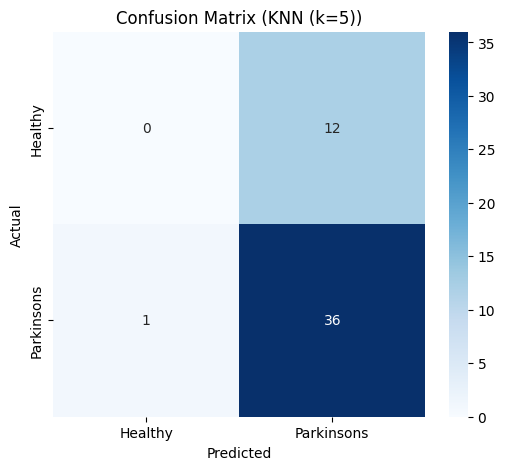

In [207]:
print(f"\nDetailed Report for {best_model_name}:")
print(classification_report(y_test, best_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix ({best_model_name})')
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.78      0.97      0.87        37

    accuracy                           0.78        49
   macro avg       0.72      0.57      0.57        49
weighted avg       0.75      0.78      0.72        49



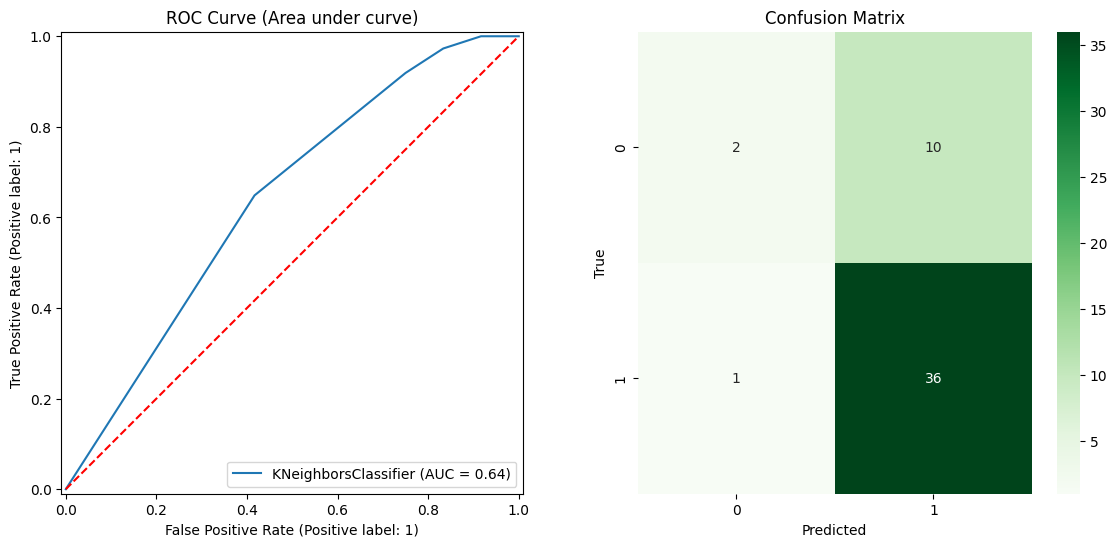

In [208]:
X_train_prediction = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Матрица ошибок
print("\nClassification Report:")
print(classification_report(y_test, X_train_prediction))

# Визуализация ROC Curve
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# ROC
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax[0])
ax[0].set_title("ROC Curve (Area under curve)")
ax[0].plot([0, 1], [0, 1], linestyle='--', color='red')

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, X_train_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

plt.show()

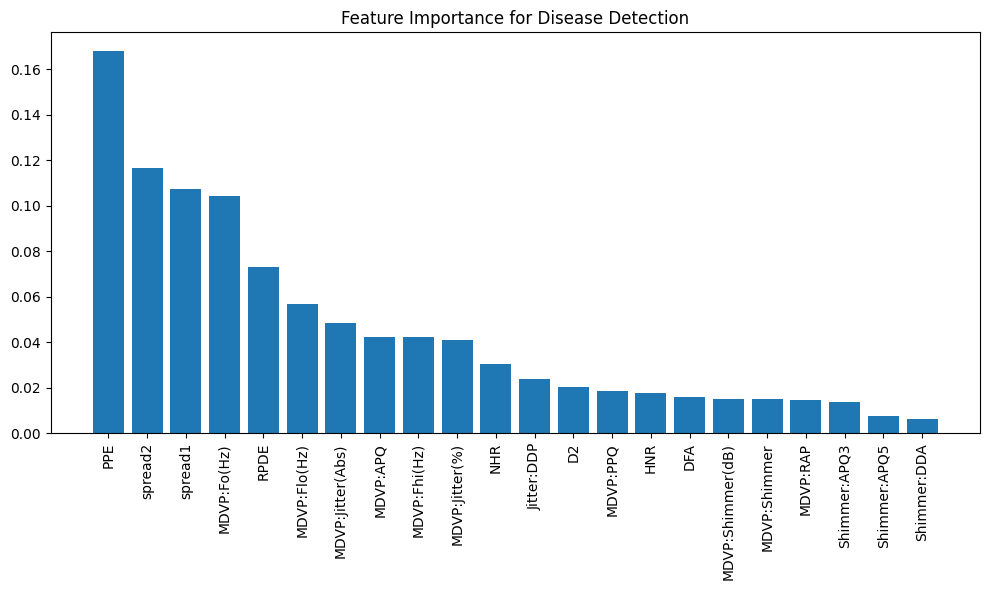

In [199]:
rf = models["Random Forest"]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Disease Detection")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [107]:
X_test

array([[-0.77610688, -0.75056356, -0.01289184, ...,  0.47939502,
        -0.79070518, -0.80861384],
       [-0.75731016, -0.73480581, -0.03797842, ...,  0.46226589,
        -0.85749909, -0.86418303],
       [-0.72143652, -0.67979612,  0.02696102, ...,  0.3364239 ,
        -1.41855693, -1.14576693],
       ...,
       [-0.91252843,  4.32763061, -0.69331617, ..., -0.87990044,
        -0.57590552, -0.95615309],
       [-0.91771206,  4.2099296 , -0.50861081, ..., -1.32073807,
        -0.60171113, -0.75297791],
       [-0.96080402, -0.85405191, -0.68366395, ..., -0.92336635,
        -1.22529119, -0.94311463]], shape=(49, 22))

In [198]:
input_data = (214.28900,260.27700,77.97300,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.19000,0.01026,0.01161,0.01373,0.03078,0.04398,21.20900,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/opt/homebrew/Cellar/jupyterlab/4.4.3/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
